In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterworkflow.data import get_url_data
import pandas as pd
from sklearn import preprocessing 

import numpy as np

# Load data

In [2]:
%%time
data = get_url_data()

...loading csv
CPU times: user 15.8 s, sys: 972 ms, total: 16.8 s
Wall time: 17.2 s


In [3]:
data.head()

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Date received,,,,,,,,,,,,,,,,,
2014-03-12,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
2017-01-19,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
2014-06-08,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
2014-09-13,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [4]:
# Number of companies complained about
companies = data['Company'].value_counts()
print('Number of Companies compained about: {}'.format(len(companies)))

Number of Companies compained about: 5014


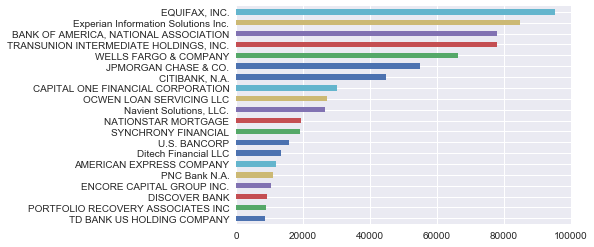

In [5]:
# Top 20 complained against companies
top_20 = data['Company'].value_counts()[0:20]
top_20[::-1].plot(kind='barh');

## plot data

https://www.consumer.ftc.gov/blog/2017/09/equifax-data-breach-what-do

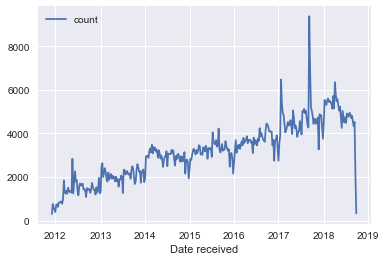

In [14]:
data['Company'].groupby([data.index]).agg([ 'count']).resample('W').sum().plot();

In [34]:
data.groupby(['Date received', 'State'])['Company'].agg([ 'count']).pivot_table('count', index = 'Date received', columns='State', fill_value=0).sum().sort_values(ascending=False)

State
CA                                      156950
FL                                      108770
TX                                       93396
NY                                       75976
GA                                       57988
IL                                       43585
NJ                                       43023
PA                                       39162
NC                                       34484
OH                                       33980
VA                                       33652
MD                                       33280
MI                                       27176
AZ                                       24377
WA                                       22101
MA                                       20579
CO                                       18481
TN                                       18456
SC                                       16457
MO                                       15518
NV                                       13880
LA     

/Users/cristian/anaconda/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


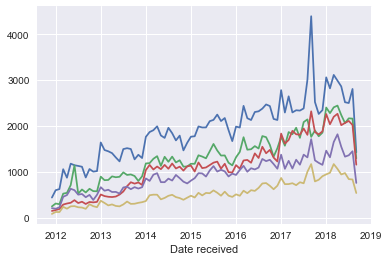

In [45]:
data.groupby(['Date received', 'State'])['Company'].agg(['count']).pivot_table(
    'count', index='Date received', columns='State', fill_value=0).resample('M').sum().plot(y=['CA', 'FL','TX','NY','IL'], legend=False);

In [ ]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

In [ ]:
data.groupby(data.index.time).mean().plot();

In [ ]:
# This can also be done as day of week in index and different weeks for columns

# this is hour in the index and days in the columns, gives the traffic flow for each hour of the day 
pivoted_table = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted_table.head()

In [ ]:
pivoted_table.plot(legend = False, alpha = 0.01)

 # Refactored code

In [ ]:
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [ ]:
pivoted.plot(legend=False, alpha = 0.1);

In [ ]:
pivoted.T.shape
# this yields 2097 observations for hour of the day 

In [ ]:
from sklearn.decomposition import PCA
PCA(2)

In [ ]:
X = pivoted.fillna(0).T.values

In [ ]:
X.shape

In [ ]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1]);

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap='rainbow');
plt.colorbar()

In [ ]:
len(labels)

In [ ]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==0].T.plot(legend=False, alpha = 0.1);

In [ ]:
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

In [ ]:
# want to see what day of week these graphs represnent 
pivoted.columns

In [ ]:
pd.DatetimeIndex(pivoted.columns).dayofweek

In [ ]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

In [ ]:
plt.scatter(X2[:, 0], X2[:, 1], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [ ]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dates.dayofweek<5)]

# Look at blog post on this analysis as well

# Can look at days with smallest granularity and week as columns in dataframe. 

# Full PCA analysis, solving for multiples axes, up to 7 for 7 days of the week 

can solve for the smallest number between observations or variables 

In [ ]:
# create PCA object
pca= PCA()

In [ ]:
# need to center and scale the data 
# the data also needs to be transposed. The columns or varibales become the rows for PCA loading scores
# only scale data if it's not on the same scale 
# https://stats.stackexchange.com/questions/105592/not-normalizing-data-before-pca-gives-better-explained-variance-ratio#105649
scaled_data = X

In [ ]:
# calculate loading scores and variation each principle compenent acount for 
pca.fit(scaled_data)

In [ ]:
# generate coordinates based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [ ]:
# scree plot
# generate percentage that each PCA accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# generate labels for scree plot
labels = ['PC' + str(num) for num in range(1, len(per_var) + 1)]

In [ ]:
plt.bar(left=range(1, len(per_var) + 1), height = per_var, tick_label=labels)
plt.show()

In [ ]:
X.shape

In [ ]:
# generate df with pca coordinates, variables are presented as rows, thus the index should be variable names, the columns represent the different PCA axis 
pca_df = pd.DataFrame(pca_data, index = pivoted.T.index.values,columns=labels)

In [ ]:
pca_df.head()

In [ ]:
# plot pc1 versus pc2
pca_df.plot(kind='scatter', x='PC1', y='PC2')
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

# plot labels
#for sample in pca_df.index:
 #   plt.annotate(sample, (pca_df['PC1'][sample]+.2,  pca_df['PC2'][sample]))

In [ ]:
# let's look at the loading score for PC1 to see which ones had the largest influence on separating the two clusters along the x axis
# series object from loading scores in PC1
# top 10 by absolute value, capturing index 
loading_scores = pd.DataFrame(pca.components_[0], index = pivoted.index.values)
sorted_loading_scores = loading_scores.abs().sort_values( by = [0],ascending=False)
top_ten_genes = sorted_loading_scores[0:10].index
loading_scores[loading_scores.index.isin(top_ten_genes)].sort_values(by=0,ascending=False)

In [ ]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

In [ ]:
plt.scatter(pca_df['PC1'],pca_df['PC2'], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)
labels

In [ ]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

In [ ]:
# Isolates weekdays
pd.Series(pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')).value_counts().plot(kind='bar');

In [ ]:
# Sundays that behave like weekdays
Sun_index  = pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')=='Sun'
pd.DatetimeIndex(pivoted.T[labels==0].index)[Sun_index]

In [ ]:
# isolate weekends
pd.Series(pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')).value_counts().plot(kind='bar');

In [ ]:
# Solve for Tue
Tue_index  = pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')=='Tue'

In [ ]:
# All Tuesdays that behave like Weekends 
pd.DatetimeIndex(pivoted.T[labels==1].index)[Tue_index]

# If days behave differently then subtract them break them out into separate analysis for predicting. 